# Imports

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette("RdBu")
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('precision',6)
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA

# Load Data

In [157]:
# https://www.kaggle.com/ahsen1330/us-police-shootings
df = pd.read_csv(r'C:\Users\kofil\OneDrive\Desktop\Kaggle\OIS\shootings.csv')

# Data Manipulation

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4895 non-null   int64  
 1   name         4895 non-null   object 
 2   date         4895 non-null   object 
 3   cod          4895 non-null   object 
 4   armed        4895 non-null   object 
 5   age          4895 non-null   float64
 6   gender       4895 non-null   object 
 7   race         4895 non-null   object 
 8   city         4895 non-null   object 
 9   state        4895 non-null   object 
 10  somi         4895 non-null   bool   
 11  threatlevel  4895 non-null   object 
 12  flee         4895 non-null   object 
 13  bodycam      4895 non-null   bool   
 14  armscat      4895 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(11)
memory usage: 506.8+ KB


In [9]:
# Checking for Duplicates
df.duplicated().values.any()

False

In [12]:
# Checking for Nulls
df.isnull()

,id,name,date,cod,armed,age,gender,race,city,state,somi,threatlevel,flee,bodycam,armscat
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4891,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4892,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4893,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# Percentage of Nulls by Column
for col in df.columns:
    print(col, str(round(100* df[col].isnull().sum() / len(df), 2)) + '%')

id 0.0%
name 0.0%
date 0.0%
cod 0.0%
armed 0.0%
age 0.0%
gender 0.0%
race 0.0%
city 0.0%
state 0.0%
somi 0.0%
threatlevel 0.0%
flee 0.0%
bodycam 0.0%
armscat 0.0%


In [11]:
df.head()

,id,name,date,cod,armed,age,gender,race,city,state,somi,threatlevel,flee,bodycam,armscat
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


# EDA

### Cause of Death Distribution

In [128]:


data = df['cod'].value_counts().reset_index()
data.columns = ['cod', 'count']
fig = px.pie(
    data, 
    values='count', 
    names='cod', 
    title='Cause of Death', 
    width=500, 
    height=500,
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.show()

#### Getting shot was the overwhelming cause of death

### Weapon Distribution

In [23]:


data = df['armed'].value_counts().reset_index()
data.columns = ['armed', 'count']
data = data.sort_values('count')
fig = px.bar(
    data.tail(25), 
    x='count', 
    y='armed', 
    orientation='h', 
    title='Weapon', 
    width=800, 
    height=800
)
fig.show()

#### Most popular weapons are guns and knives

### Age Distribution

In [131]:
fig = px.histogram(
    df, 
    "age", 
    nbins=80, 
    title ='Age Distribution', 
    width=1000,
)
fig.show()

In [35]:
fig = px.box(df, y="age", title="Age Box and Whisker")
fig.show()

### Age Distribution - Total (KDE)

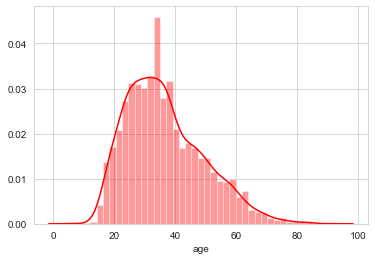

In [97]:
sns.distplot(df['age'],kde=True,color='r')

### Age Distribution - Male vs Female

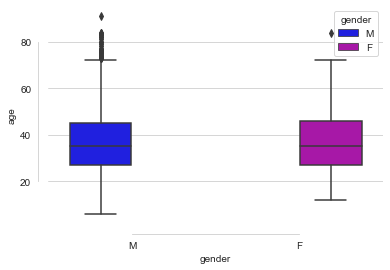

In [134]:
sns.boxplot(x="gender", y="age", palette=["b", "m"],data=df,width=0.75, hue='gender')
sns.despine(offset=10, trim=True)

### Age Box and Whisker Plot

In [135]:
fig = go.Figure(
    data=go.Violin(
        y=df['age'], 
        x0='Age',
        fillcolor='gold'
    )
)
fig.show()

### Age Distribution by Races

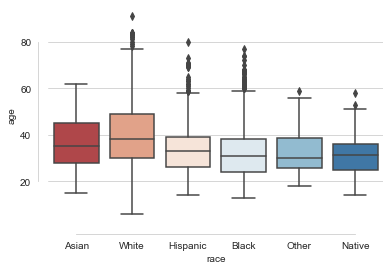

In [103]:
sns.boxplot(x="race", y="age",data=df)
sns.despine(offset=10, trim=True)

### Race Distribution

In [93]:
df["Count"]=1

rc=df.groupby("race").sum()

fig = go.Figure(data=[go.Pie(labels=rc.index, values=rc.Count, hole=.3)])
fig.show()

### Gender Distribution

In [96]:
data = df['gender'].value_counts().reset_index()
data.columns = ['gender', 'count']
fig = px.pie(
    data, 
    values='count', 
    names='gender',  
    title='Gender Distribution', 
    width=500, 
    height=500
)
fig.show()

### Race Distribution

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64


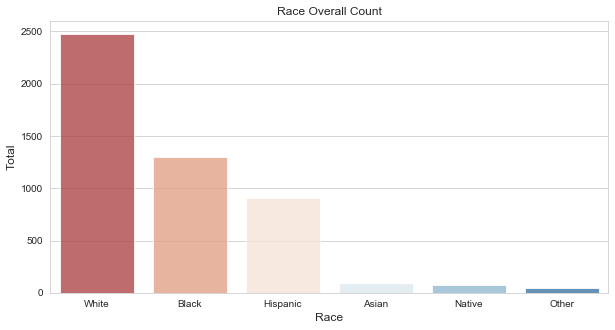

In [92]:
r_count  = df['race'].value_counts()
r_count = r_count[:10,]
plt.figure(figsize=(10,5))
print(df['race'].value_counts())
sns.barplot(r_count.index, r_count.values, alpha=0.8)
plt.title('Race Overall Count')
plt.ylabel('Total', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.show()

### Top 50 Cities by Deaths

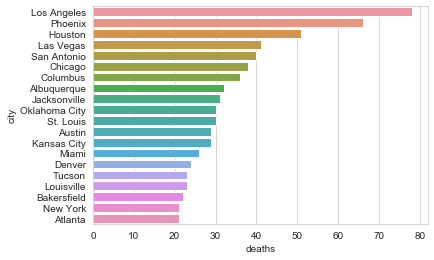

In [106]:
df=df['city'].value_counts().reset_index().rename(columns={'index':'city','city':'deaths'}).head(20)

sns.barplot(y="city", x="deaths", data=df,
            label="deaths")

### Number of Deaths by State

In [111]:
df=df['state'].value_counts().reset_index().rename(columns={'index':'state','state':'deaths'})

fig = go.Figure(go.Bar(
    x=df['state'],y=df['deaths'],
    marker={'color': df['deaths'], 
    'colorscale': 'Viridis'},  
))
fig.update_layout(title_text='Number of Deaths by State',xaxis_title="state",yaxis_title="count",height=500,width=1000)
fig.show()

# Date Featuring Engineering

### Datatype Conversion

In [163]:
df["date"] = pd.to_datetime(df["date"])
df["weekday"] = df["date"].dt.weekday
df['month'] = df['date'].dt.month
df['month_day'] = df['date'].dt.day
df['year'] = df['date'].dt.year

### Number of Incidents by Weekday

In [168]:
# 0 index = Monday, 1 = Tuesday, 2 = Wednesday, ... 
# Nuke Colors?



data = df.groupby(['weekday'])['name'].count().reset_index()
data.columns = ['weekday', 'count']
fig = px.bar(
    data, 
    x='weekday', 
    y='count',
    orientation='v', 
    title='Number of Incidents by Weekday', 
    width=1000,
)
fig.show()

### Number of Incidents by Month

In [60]:
data = df.groupby(['month'])['name'].count().reset_index()
data.columns = ['month', 'count']
fig = px.bar(
    data, 
    x='month', 
    y='count', 
    orientation='v', 
    title='Number of Incidents by Month', 
    width=1000
)
fig.show()

### Number of Incidents by Day of Month

In [59]:
data = df.groupby(['month_day'])['name'].count().reset_index()
data.columns = ['month_day', 'count']
fig = px.bar(
    data, 
    x='month_day', 
    y='count', 
    orientation='v', 
    title='Number of Incidents by Day of Month', 
    width=1000
)
fig.show()

### Number of Incidents by Year

In [77]:
data = df.groupby(['year'])['name'].count().reset_index()
data.columns = ['year', 'count']
fig = px.bar(
    data, 
    x='year', 
    y='count',
    orientation='v', 
    title='Number of Incidents by Year', 
    width=1000
)
fig.show()

In [68]:
## I actually have no idea what this does

## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_period.html

df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df.head()

,id,name,date,cod,armed,age,gender,race,city,state,somi,threatlevel,flee,bodycam,armscat,weekday,month,month_day,year,month_year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,4,1,2,2015,2015-01
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,4,1,2,2015,2015-01
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,5,1,3,2015,2015-01
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,6,1,4,2015,2015-01
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,6,1,4,2015,2015-01


### Death by Month, Per Each Year

In [113]:
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(
    yaxis_title="Count of Death by Month ",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

In [76]:
## Possible Removal --> Too Clutered


data = df.groupby(['month_year'])['name'].count().reset_index()
data.columns = ['month_year', 'count']
data['month_year'] = data['month_year'].astype(str)
fig = px.bar(
    data, 
    x='month_year', 
    y='count', 
    orientation='v', 
    title='Deaths by Months', 
    width=1000
)
fig.show()

In [167]:
data = df.groupby(['month'])['name'].count().reset_index()
data.columns = ['month', 'count']
data['month'] = data['month'].astype(str)
data = data.head(65)
fig = px.line(
    data, 
    x="month", 
    y="count", 
    title='Total Deaths Trend by Month'
)
fig.show()

### Flee Distribution

In [75]:
data = df.groupby(['flee'])['name'].count().reset_index()
data.columns = ['flee', 'count']
fig = px.bar(
    data, 
    x='flee', 
    y='count', 
    orientation='v', 
    title='Flee Distribution', 
    width=800
)
fig.show()

# Predict the Number of Deaths until the end of 2021

### ARIMA Forecasting Model

In [162]:
df

,id,name,date,cod,armed,age,gender,race,city,state,somi,threatlevel,flee,bodycam,armscat
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,6/12/2020,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,6/12/2020,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,6/13/2020,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,6/13/2020,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [165]:
data = df.groupby(['month'])['name'].count().reset_index()
data.columns = ['month', 'count']
data['month'] = data['month'].astype(str)
data = data.head(65)
fig = px.line(
    data, 
    x="month", 
    y="count", 
    title='Deaths Trend by Month Per Year'
)
fig.show()

In [83]:
model = ARIMA(data['count'], order=(3,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                   64
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -248.364
Method:                       css-mle   S.D. of innovations             11.309
Date:                Tue, 20 Oct 2020   AIC                            508.728
Time:                        01:42:08   BIC                            521.681
Sample:                             1   HQIC                           513.830
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1943      0.063     -3.080      0.002      -0.318      -0.071
ar.L1.D.count     0.0427      0.125      0.341      0.733      -0.203       0.288
ar.L2.D.count    -0.1492      0.123     

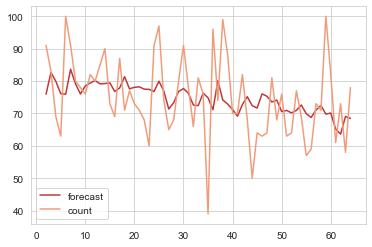

In [84]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [125]:
preds, _, _ = model_fit.forecast(19, alpha=0.05)
preds = preds.tolist()
preds = [int(item) for item in preds]
months = ['2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', 
          '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']

new_df = pd.DataFrame()
new_df['month_year'] = months
new_df['count'] = preds
data = pd.concat([data, new_df])

In [127]:
fig = px.line(
    data, 
    x="month_year", 
    y="count", 
    title='Deaths by Month, Per Year with Predictions'
)
fig.show()